# Noise Interferometry Test
This tests the functionality of the noise interferometry module of ooipy

## Sections
- Compute Cross Correlation for specified window

First, let's import all dependancies

In [5]:
import os
import sys
cwd = os.getcwd()
ooipy_dir = os.path.dirname(cwd) + '/ooipy'
sys.path.append(ooipy_dir)
from matplotlib import pyplot as plt
import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
from ooipy.hydrophone import Noise_Interferometry
import pickle

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading in Checkpoints

Checkpoint for k = 0


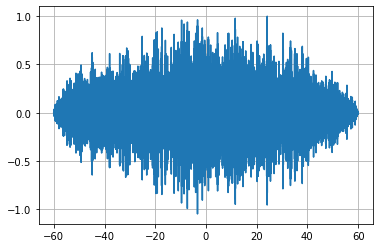

In [20]:
ckpt_name = './ckpts/ckpt_0.pkl'

with open(ckpt_name, 'rb') as f:
    xcorr = pickle.load(f)
    k = pickle.load(f)

print('Checkpoint for k =',k)

#Plot Xcorr
dt = 1/64000
t = np.arange(-xcorr.shape[0]*dt/2,xcorr.shape[0]*dt/2,dt)

plt.plot(t,xcorr)
plt.grid()

## Compute Cross Correlation for Specified Window

In [28]:
num_periods = 5
avg_time = 1 #minutes
start_time = datetime.datetime(2017,3,10,0,0,0) # time of first sample
node1 = '/LJ01C'
node2 = '/PC01A'
filter_data = True

#Initialize Hydrophone Xcorr Class
hyd_xcorr = Noise_Interferometry.Hydrophone_Xcorr(node1=node1, node2=node2, avg_time=avg_time, mp=True, W=60, filter_data=filter_data)

Distance Between Hydrophones:  38897.93618108771  meters
Estimate Time Delay Between Hydrophones:  26.28238931154575  seconds
Bearing Between Hydrophone 1 and 2:  297.28608345  degrees




Time Period:  1
Getting Audio from Node 1...
Fetching URLs...
Sorting valid URLs for Time Window...
Getting Audio from Node 2...
Fetching URLs...
Sorting valid URLs for Time Window...
Time to Download Data from Server:  7.07540225982666
Filtering Data...
Correlating Data...
Time to Calculate Cross Correlation of 1 period:  0.6478612422943115


Time Period:  2
Getting Audio from Node 1...
Fetching URLs...
Sorting valid URLs for Time Window...
Getting Audio from Node 2...
Fetching URLs...
Sorting valid URLs for Time Window...
Time to Download Data from Server:  7.002065658569336
Filtering Data...
Correlating Data...
Time to Calculate Cross Correlation of 1 period:  0.6677303314208984


Time Period:  3
Getting Audio from Node 1...
Fetching URLs...
Sorting valid URLs for Time Window...
Getting Audio from Node 2...
Fetching URLs...
Sorting valid URLs for Time Window...
Time to Download Data from Server:  7.3709940910339355
Filtering Data...
Correlating Data...
Time to Calculate Cross Corr

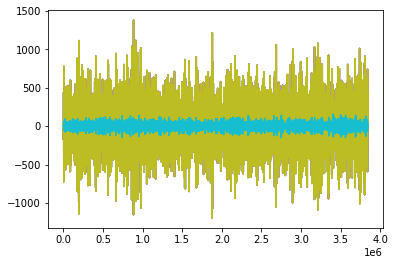

In [29]:
# Average Cross Correlation Over Specified time
hyd_xcorr.avg_over_mult_periods(num_periods, start_time)

## Testing List of Functions ReWrite

In [39]:
num_periods = 5
avg_time = 1 #minutes
start_time = datetime.datetime(2017,3,10,0,0,0) # time of first sample
node1 = '/LJ01C'
node2 = '/PC01A'
filter_data = True
W = 30

Noise_Interferometry.calculate_NCF(node1, node2, avg_time, start_time, W=30, verbose=True, filter_data=filter_data)

Getting Audio from Node 1...
Fetching URLs...
Sorting valid URLs for Time Window...
Getting Audio from Node 2...
Fetching URLs...
Sorting valid URLs for Time Window...
Filtering Data...
Correlating Data...
Time to Calculate NCF for 1 Average Period:  9.08384919166565


In [47]:
Noise_Interferometry.calculate_NCF_loop(num_periods, node1, node2, avg_time, start_time, count, W=30, verbose=True)

Calculting NCF for Period 1:
   Getting Audio from Node 1...
   Getting Audio from Node 2...
   Filtering Data...
   Correlating Data...
   Time to Calculate NCF for 1 Average Period: 9.022732734680176 


Calculting NCF for Period 2:
   Getting Audio from Node 1...
   Getting Audio from Node 2...
   Filtering Data...
   Correlating Data...
   Time to Calculate NCF for 1 Average Period: 9.430347681045532 


Calculting NCF for Period 3:
   Getting Audio from Node 1...
   Getting Audio from Node 2...
   Filtering Data...
   Correlating Data...
   Time to Calculate NCF for 1 Average Period: 9.107947826385498 


Calculting NCF for Period 4:
   Getting Audio from Node 1...
   Getting Audio from Node 2...
   Filtering Data...
   Correlating Data...
   Time to Calculate NCF for 1 Average Period: 9.048683643341064 


Calculting NCF for Period 5:
   Getting Audio from Node 1...
   Getting Audio from Node 2...
   Filtering Data...
   Correlating Data...
   Time to Calculate NCF for 1 Average Peri